#  Linear Regression model and a Decision Tree Regression Model to Predict Apple’s Stock Price 

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from autots import AutoTS
import warnings
warnings.filterwarnings("ignore")
sns.set()


In [2]:
apple = pd.read_csv(r"C:\Users\Sahito\Downloads\py\Stock Price Prediction\AAPL.csv")
print(apple.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2020-09-08  113.949997  118.989998  112.680000  112.820000  111.629189   
1  2020-09-09  117.260002  119.139999  115.260002  117.320000  116.081696   
2  2020-09-10  120.360001  120.500000  112.500000  113.489998  112.292122   
3  2020-09-11  114.570000  115.230003  110.000000  112.000000  110.817848   
4  2020-09-14  114.720001  115.930000  112.800003  115.360001  114.142387   

      Volume  
0  231366600  
1  176940500  
2  182274400  
3  180860300  
4  140150100  


In [3]:
print("trainging days =",apple.shape)

trainging days = (252, 7)


**To Visualize the close price Data:**

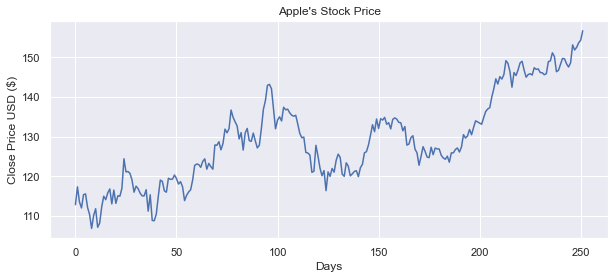

In [5]:
plt.figure(figsize=(10, 4))
plt.title("Apple's Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close"])
plt.show()

**To get the close price:**




In [7]:
apple = apple[["Close"]]
print(apple.head())

        Close
0  112.820000
1  117.320000
2  113.489998
3  112.000000
4  115.360001


**Creating a variable to predict ‘X’ days in the future:**

In [8]:
futureDays = 25

**Create a new target column shifted ‘X’ units/days up:**

In [9]:
apple["Prediction"] = apple[["Close"]].shift(-futureDays)
print(apple.head())
print(apple.tail())

        Close  Prediction
0  112.820000  121.099998
1  117.320000  121.190002
2  113.489998  120.709999
3  112.000000  119.019997
4  115.360001  115.980003
          Close  Prediction
247  151.830002         NaN
248  152.509995         NaN
249  153.649994         NaN
250  154.300003         NaN
251  156.690002         NaN


C:\Users\Sahito\AppData\Local\Temp/ipykernel_6112/4162881674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple["Prediction"] = apple[["Close"]].shift(-futureDays)


**To create a feature dataset (x) and convert into a numpy array and remove last ‘x’ rows/days:**

In [10]:
import numpy as np
x = np.array(apple.drop(["Prediction"], 1))[:-futureDays]
print(x)

[[112.82    ]
 [117.32    ]
 [113.489998]
 [112.      ]
 [115.360001]
 [115.540001]
 [112.129997]
 [110.339996]
 [106.839996]
 [110.080002]
 [111.809998]
 [107.120003]
 [108.220001]
 [112.279999]
 [114.959999]
 [114.089996]
 [115.809998]
 [116.790001]
 [113.019997]
 [116.5     ]
 [113.160004]
 [115.080002]
 [114.970001]
 [116.970001]
 [124.400002]
 [121.099998]
 [121.190002]
 [120.709999]
 [119.019997]
 [115.980003]
 [117.510002]
 [116.870003]
 [115.75    ]
 [115.040001]
 [115.050003]
 [116.599998]
 [111.199997]
 [115.32    ]
 [108.860001]
 [108.769997]
 [110.440002]
 [114.949997]
 [119.029999]
 [118.690002]
 [116.32    ]
 [115.970001]
 [119.489998]
 [119.209999]
 [119.260002]
 [120.300003]
 [119.389999]
 [118.029999]
 [118.639999]
 [117.339996]
 [113.849998]
 [115.169998]
 [116.029999]
 [116.589996]
 [119.050003]
 [122.720001]
 [123.080002]
 [122.940002]
 [122.25    ]
 [123.75    ]
 [124.379997]
 [121.779999]
 [123.239998]
 [122.410004]
 [121.779999]
 [127.879997]
 [127.809998]
 [128.

C:\Users\Sahito\AppData\Local\Temp/ipykernel_6112/3412463748.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(apple.drop(["Prediction"], 1))[:-futureDays]


**To create a target dataset (y) and convert it to a numpy array and get all of the target values except the last ‘x’ rows days:**

In [11]:
y = np.array(apple["Prediction"])[:-futureDays]
print(y)

[121.099998 121.190002 120.709999 119.019997 115.980003 117.510002
 116.870003 115.75     115.040001 115.050003 116.599998 111.199997
 115.32     108.860001 108.769997 110.440002 114.949997 119.029999
 118.690002 116.32     115.970001 119.489998 119.209999 119.260002
 120.300003 119.389999 118.029999 118.639999 117.339996 113.849998
 115.169998 116.029999 116.589996 119.050003 122.720001 123.080002
 122.940002 122.25     123.75     124.379997 121.779999 123.239998
 122.410004 121.779999 127.879997 127.809998 128.699997 126.660004
 128.229996 131.880005 130.960007 131.970001 136.690002 134.869995
 133.720001 132.690002 129.410004 131.009995 126.599998 130.919998
 132.050003 128.979996 128.800003 130.889999 128.910004 127.139999
 127.830002 132.029999 136.869995 139.070007 142.919998 143.160004
 142.059998 137.089996 131.960007 134.139999 134.990005 133.940002
 137.389999 136.759995 136.910004 136.009995 135.389999 135.130005
 135.369995 133.190002 130.839996 129.710007 129.869995 126.
 

**Split the data into 75% training and 25% testing**

In [12]:

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

# Creating Models

**Decision Dree Regressor model**

In [13]:
tree = DecisionTreeRegressor().fit(xtrain, ytrain)

**creating the Linear Regression model**

In [14]:


linear = LinearRegression().fit(xtrain, ytrain)

**To get the last ‘x’ rows/days of the feature dataset:**

In [15]:
xfuture = apple.drop(["Prediction"], 1)[:-futureDays]
xfuture = xfuture.tail(futureDays)
xfuture = np.array(xfuture)
print(xfuture)

[[134.779999]
 [136.330002]
 [136.960007]
 [137.270004]
 [139.960007]
 [142.020004]
 [144.570007]
 [143.240005]
 [145.110001]
 [144.5     ]
 [145.639999]
 [149.149994]
 [148.479996]
 [146.389999]
 [142.449997]
 [146.149994]
 [145.399994]
 [146.800003]
 [148.559998]
 [148.990005]
 [146.770004]
 [144.979996]
 [145.639999]
 [145.860001]
 [145.520004]]


C:\Users\Sahito\AppData\Local\Temp/ipykernel_6112/1426835906.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  xfuture = apple.drop(["Prediction"], 1)[:-futureDays]


**To see the model tree prediction**

In [16]:
treePrediction = tree.predict(xfuture)
print("Decision Tree prediction =",treePrediction)

Decision Tree prediction = [147.360001 146.949997 147.059998 121.029999 146.089996 145.600006
 145.860001 148.889999 148.360001 151.119995 151.919998 146.360001
 146.699997 148.190002 149.710007 148.190002 148.360001 148.190002
 146.699997 153.119995 148.190002 145.860001 151.919998 151.919998
 151.919998]


**To see the model linear regression prediction**

In [17]:
linearPrediction = linear.predict(xfuture)
print("Linear regression Prediction =",linearPrediction)

Linear regression Prediction = [134.63850042 135.53061967 135.89322515 136.07164692 137.61990421
 138.80555544 140.27323437 139.50773884 140.58403315 140.23294117
 140.88907863 142.90929026 142.52366642 141.3207484  139.05304208
 141.1826112  140.75094143 141.55673017 142.56971235 142.81720704
 141.53946396 140.50920751 140.88907863 141.01570292 140.82001435]


**Visualize decision tree predictions**

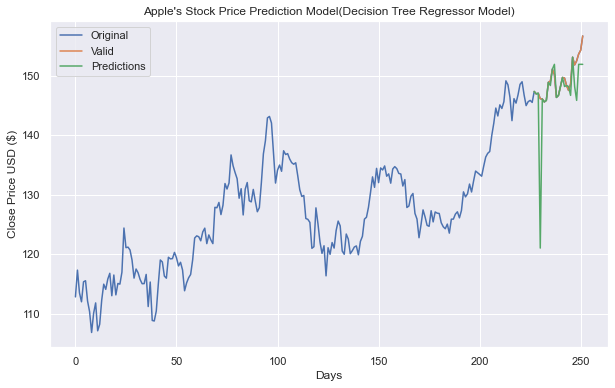

In [21]:
predictions = treePrediction
valid = apple[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Apple's Stock Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

**Visualize the linear model predictions**

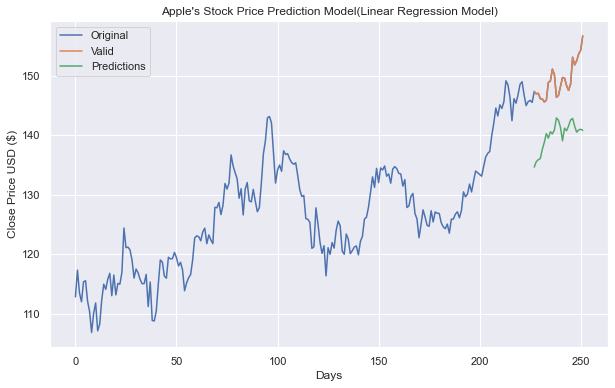

In [23]:
predictions = linearPrediction
valid = apple[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Apple's Stock Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()